# 19 - Decision Tree Classifier

*Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.*

*In a Decision tree, there are two nodes, which are the Decision Node and Leaf Node. Decision nodes are used to make any decision and have multiple branches, whereas Leaf nodes are the output of those decisions and do not contain any further branches.*

*It is a graphical representation for getting all the possible solutions to a problem/decision based on given conditions.*

# How to build decision trees ?

*Gini Impurity is a measurement of the likelihood of an incorrect classification of a new instance of a random variable.*

*It is a measurement used to build Decision Trees to determine how the features of a dataset should split nodes to from the tree.*

*It measures the impurity of a node.It is needed the most pure node to classify.*

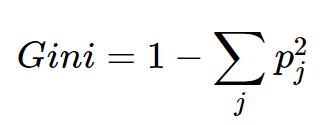

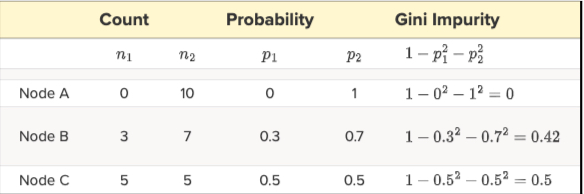

# What is max-depth in tree ? 

*The maximum depth is the number of nodes along the longest path from the root node down to the farthest leaf node.*

*It is also a hyperparameter that should be tuned.*

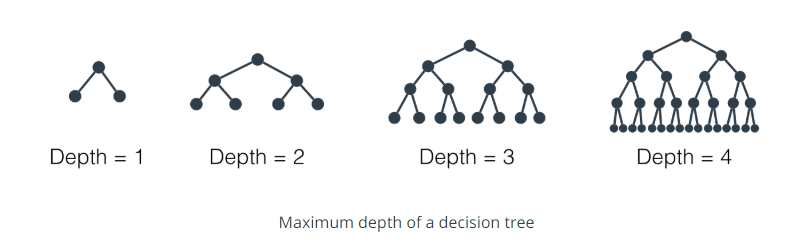

# Get and Prepare Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

# Get dataset 
df = pd.read_csv("diabetes.csv")
data = df.copy()

# Clear null values
data = data.dropna()

# Declare dependent and independent variables
X = data.drop(["Outcome"],axis=1)
y = data["Outcome"]

# Split train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=33)


In [2]:
data["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

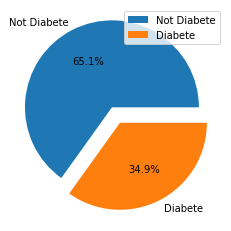

In [3]:
labels = ["Not Diabete","Diabete"]
plt.pie(x=data["Outcome"].value_counts(),labels=labels,explode=(0.1,0.1),autopct='%1.1f%%');
plt.legend()
plt.show()

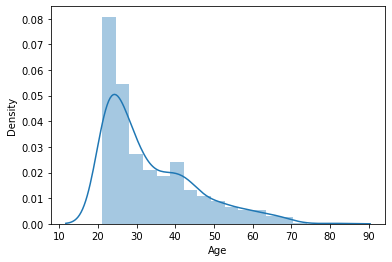

In [4]:
sns.distplot(data["Age"]);

In [5]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Import the Model

In [6]:
from sklearn.tree import DecisionTreeClassifier

cart_model = DecisionTreeClassifier(max_depth=3)
cart_model.fit(X_train,y_train)
cart_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

# Prediction

In [7]:
from sklearn.metrics import accuracy_score

y_pred = cart_model.predict(X_test)

print("Test Accuracy Score : %.2f" % (accuracy_score(y_test,y_pred)))

Test Accuracy Score : 0.74


# Visualize the Model

In [8]:
from sklearn import tree

print(tree.export_text(cart_model))

|--- feature_1 <= 127.50
|   |--- feature_7 <= 29.50
|   |   |--- feature_5 <= 32.25
|   |   |   |--- class: 0
|   |   |--- feature_5 >  32.25
|   |   |   |--- class: 0
|   |--- feature_7 >  29.50
|   |   |--- feature_5 <= 26.80
|   |   |   |--- class: 0
|   |   |--- feature_5 >  26.80
|   |   |   |--- class: 0
|--- feature_1 >  127.50
|   |--- feature_5 <= 29.95
|   |   |--- feature_1 <= 146.50
|   |   |   |--- class: 0
|   |   |--- feature_1 >  146.50
|   |   |   |--- class: 1
|   |--- feature_5 >  29.95
|   |   |--- feature_1 <= 154.50
|   |   |   |--- class: 1
|   |   |--- feature_1 >  154.50
|   |   |   |--- class: 1



In [9]:
# Extract the features names
feature_names = []
for i in range(len(data.columns)):
    if data.columns[i] != "Outcome":
        feature_names.append(data.columns[i])
            
print(feature_names)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


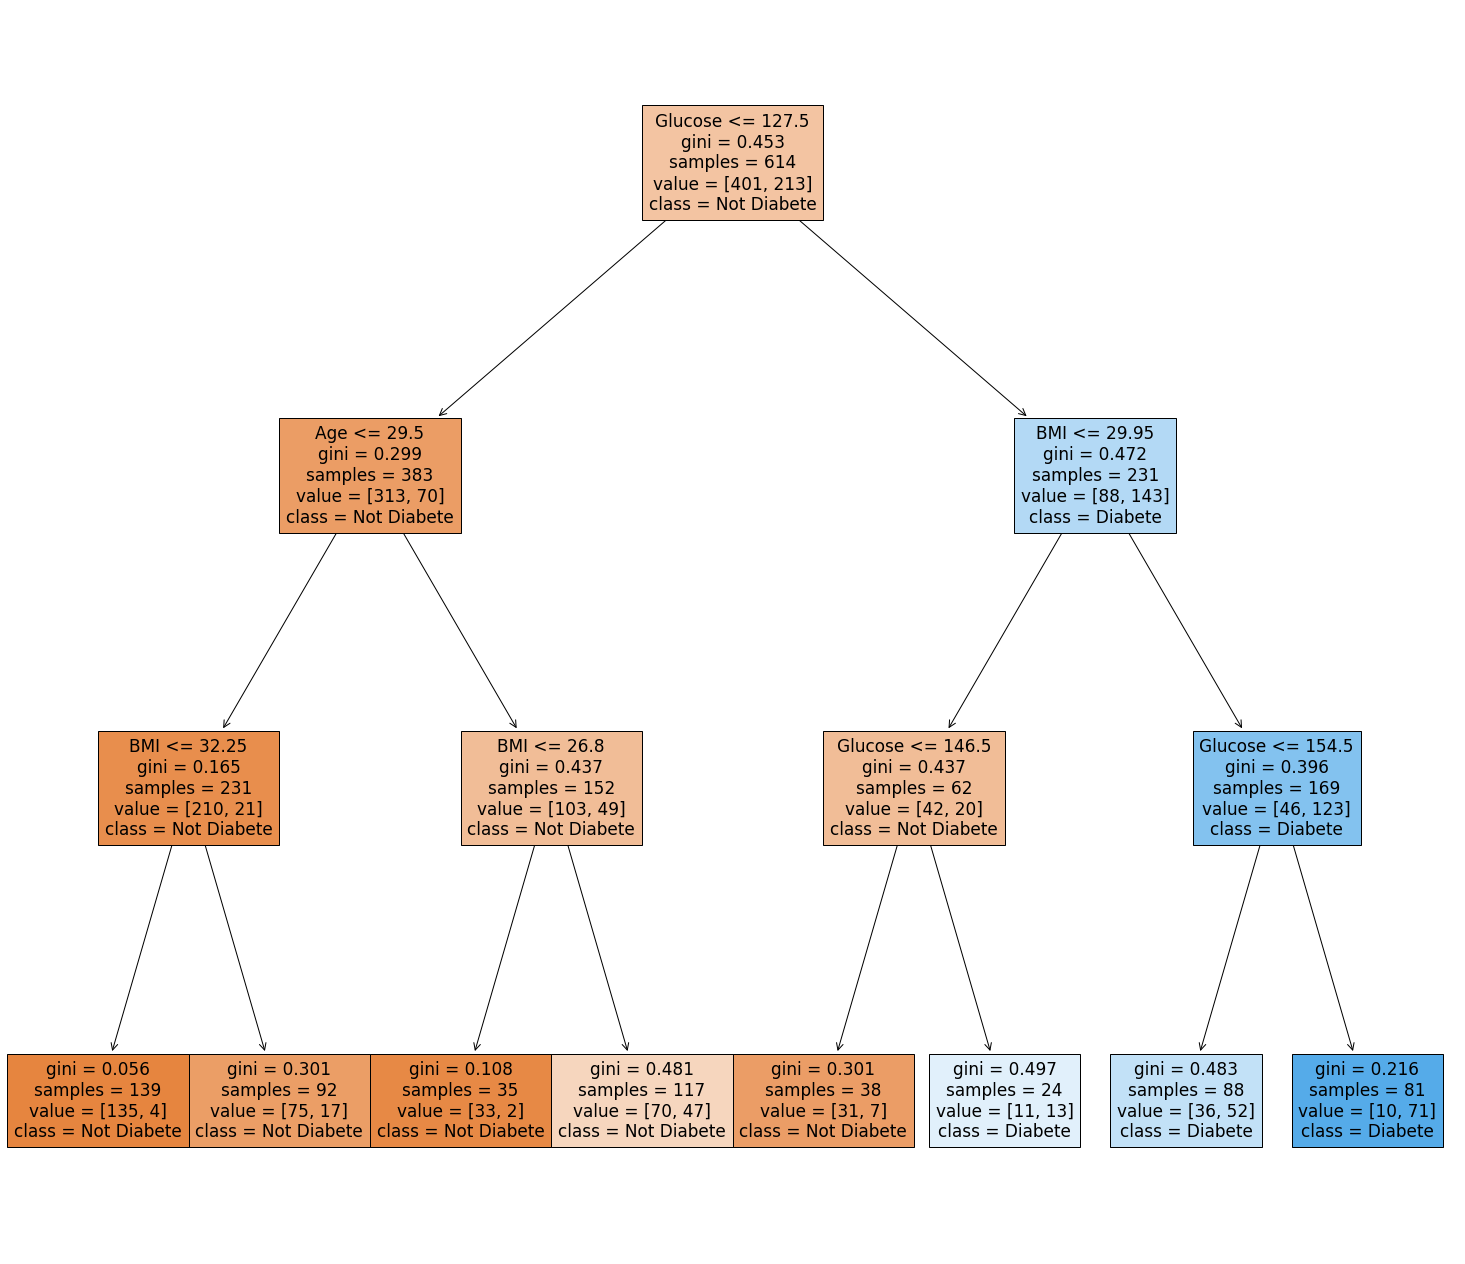

In [10]:
plt.figure(figsize=(26,23))
_ = tree.plot_tree(cart_model,feature_names=feature_names,class_names=["Not Diabete","Diabete"],filled=True)

# Model Tuning with GridSearchCv

In [11]:
from sklearn.model_selection import GridSearchCV

cart = DecisionTreeClassifier()
cart_params = {'max_depth':np.arange(1,15).tolist(),
              'min_samples_split':np.arange(2,50).tolist()}

knn_cv = GridSearchCV(cart,cart_params,cv=10).fit(X_train,y_train)
knn_cv.best_params_

{'max_depth': 2, 'min_samples_split': 2}

In [12]:
cart_tuned_model = DecisionTreeClassifier(max_depth=2,min_samples_split=2).fit(X_train,y_train)
cart_tuned_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [13]:
y_pred_tuned = cart_tuned_model.predict(X_test)
print("Tuned Test Accuracy Score : %.2f" % (accuracy_score(y_test,y_pred_tuned)))

Tuned Test Accuracy Score : 0.75


# Visualize the tuned model

In [14]:
print(tree.export_text(cart_tuned_model))

|--- feature_1 <= 127.50
|   |--- feature_7 <= 29.50
|   |   |--- class: 0
|   |--- feature_7 >  29.50
|   |   |--- class: 0
|--- feature_1 >  127.50
|   |--- feature_5 <= 29.95
|   |   |--- class: 0
|   |--- feature_5 >  29.95
|   |   |--- class: 1



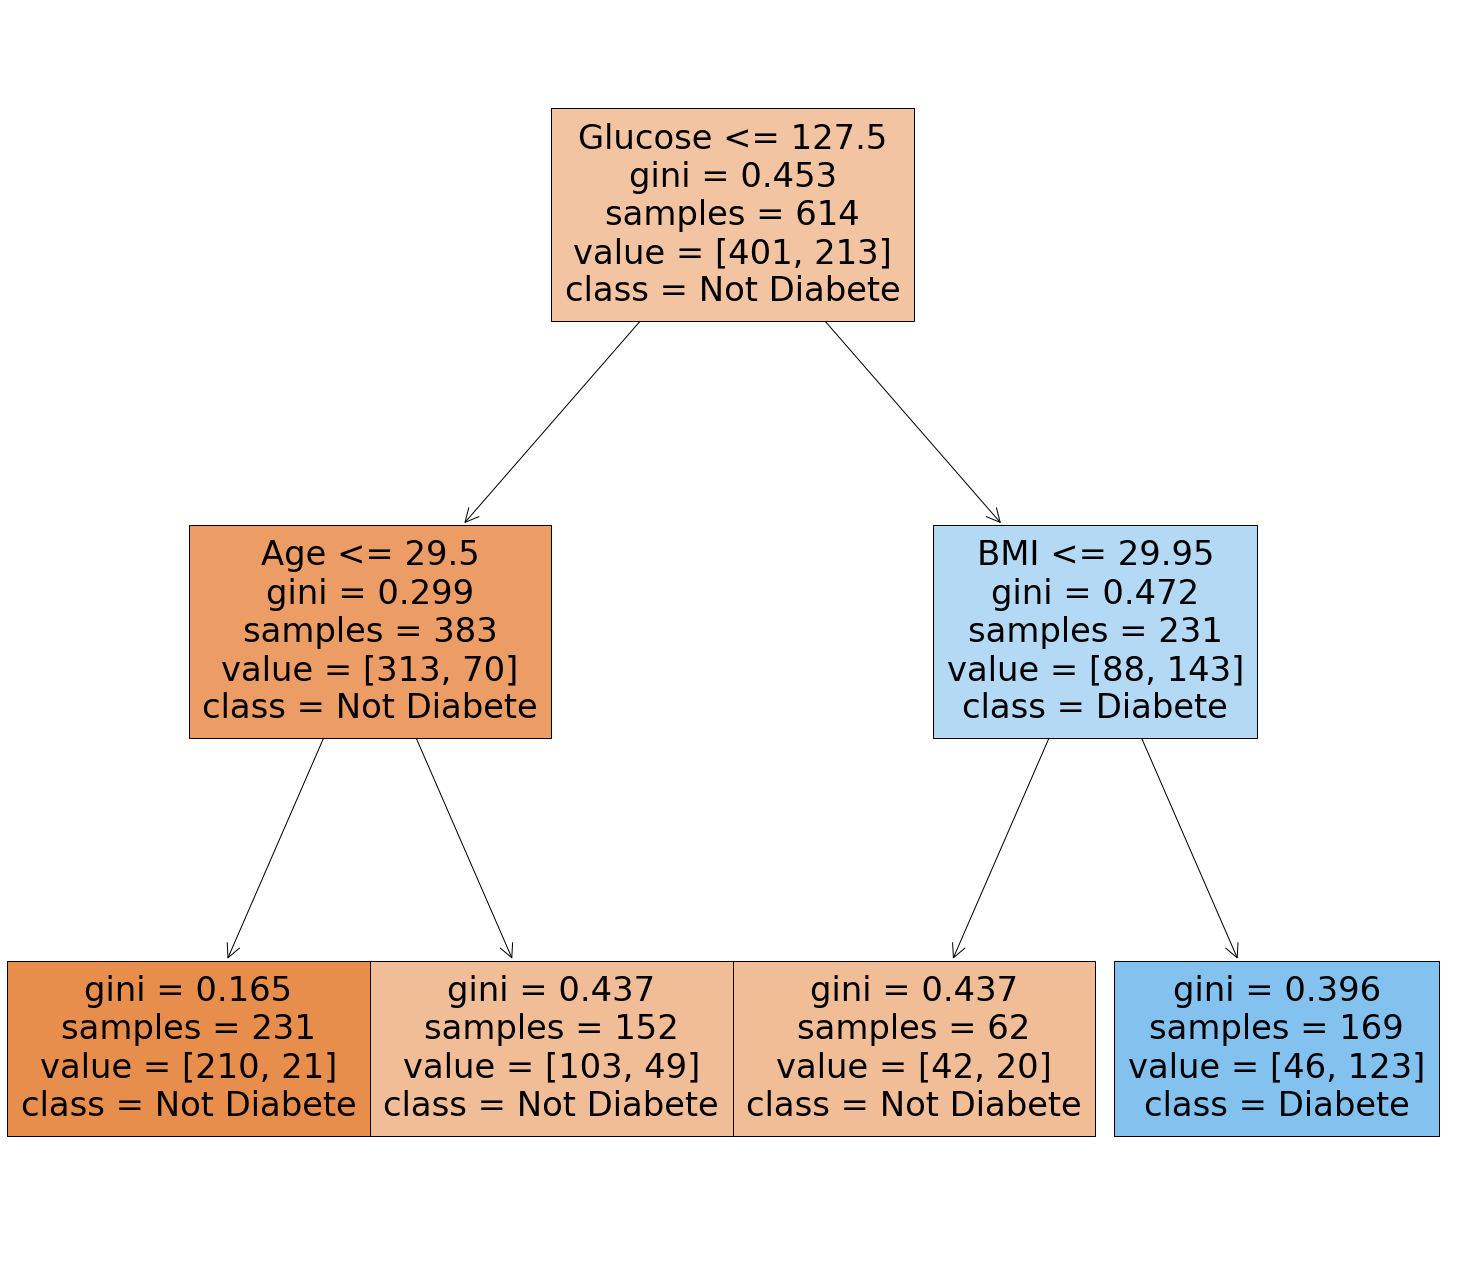

In [16]:
plt.figure(figsize=(26,23))
_ = tree.plot_tree(cart_tuned_model,feature_names=feature_names,class_names=["Not Diabete","Diabete"],filled=True)